# CUSTOMER LIFETIME VALUE ANALYSIS PROJECT

In [51]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"

In [52]:
data=pd.read_csv("customer_acquisition_data.csv")

In [53]:
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


# MAKE A VISUALIZATION FOR THE DISTRIBUTION OF CUSTOMER ACQUISITION COST

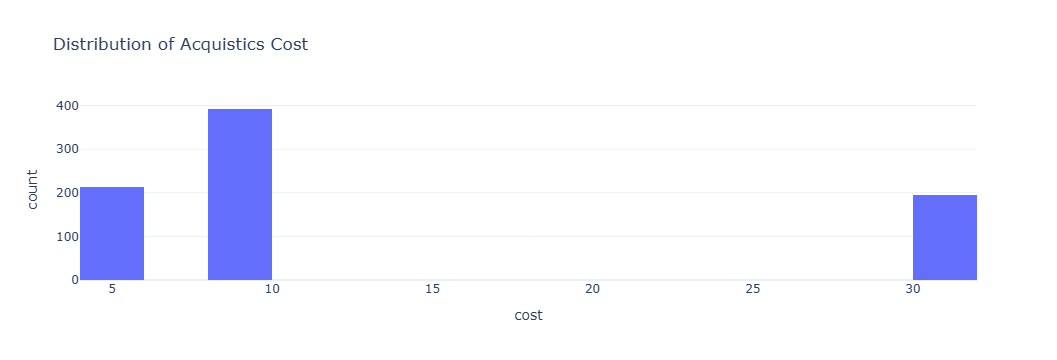

In [54]:
fig=px.histogram(data,
                x="cost",
                nbins=20,
                title="Distribution of Acquistics Cost")
fig.show()

# VISUALIZATION FOR THE REVENUE GENERATED BY THE CUSTOMERS

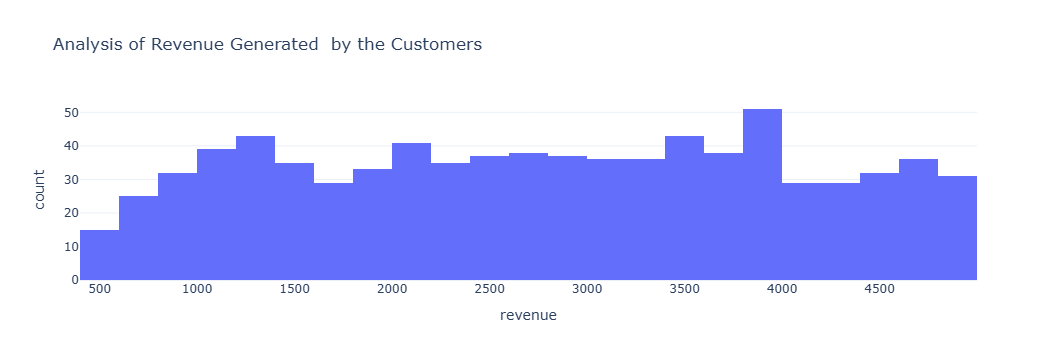

In [55]:
fig_revenue=px.histogram(data,
                        x="revenue",
                        nbins=30,
                        title="Analysis of Revenue Generated  by the Customers ")
fig_revenue.show()

# Compare the cost across various channels & Determine which ones are the most and least profitable 

In [56]:
cost_channel=data.groupby("channel")["cost"].sum().reset_index()
cost_channel

,channel,cost
0,email marketing,1122.700340
1,paid advertising,5907.363479
2,referral,1722.307634
3,social media,1766.070249


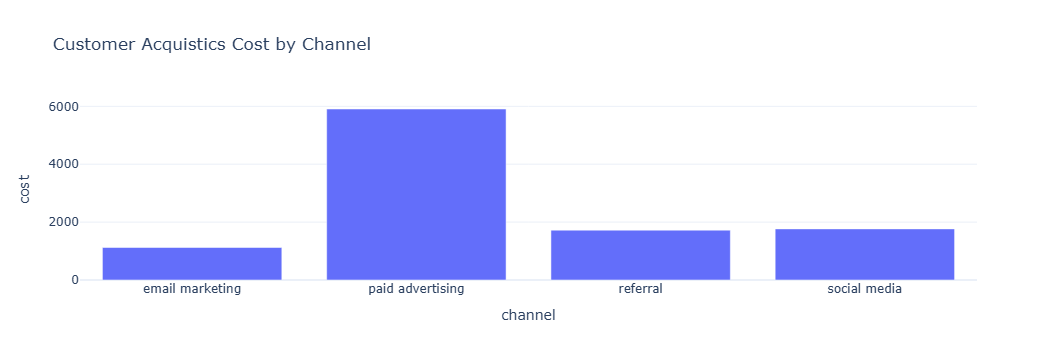

In [57]:
fig_channel=px.bar(cost_channel,
                  x="channel",
                  y="cost",
                  title="Customer Acquistics Cost by Channel")
fig_channel.show()

# FIND OUT THE CHANNELS THAT ARE MOST AND LEAST EFFCTIVE AT CONVERTING CUSTOMERS

In [31]:
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [35]:
channel_converting=data.groupby("channel")["conversion_rate"].mean().reset_index() #here we used the word mean because there are a lot of values for each channel so we can just used the mean value for checking
channel_converting

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


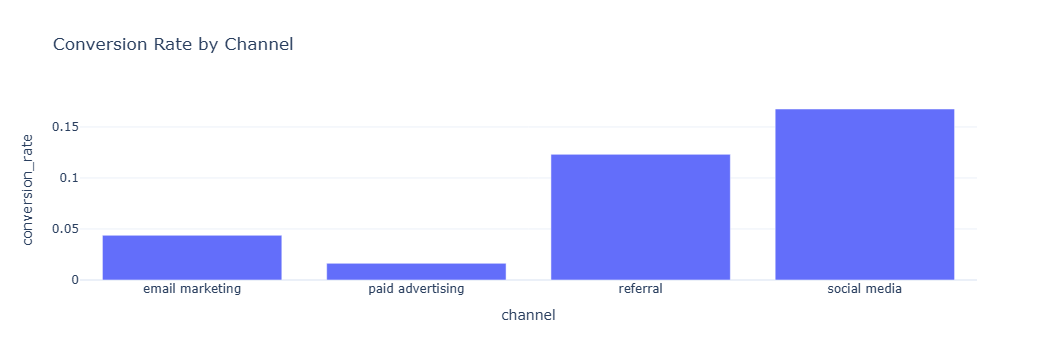

In [38]:
fig=px.bar(channel_converting, x="channel",
          y="conversion_rate",
          title="Conversion Rate by Channel")
fig.show()

# Calculate the total revenue by the channel & analyze the most and least profitable channels in terms of generating revenue

In [39]:
fig_data=data.groupby("channel")["revenue"].sum().reset_index()
fig_data

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


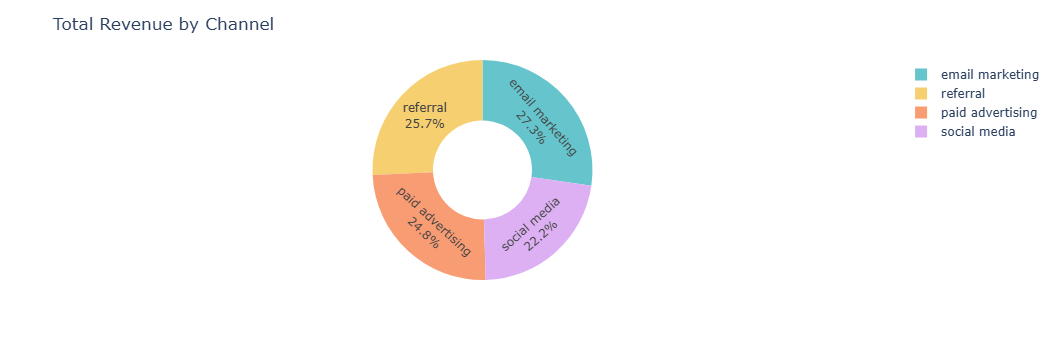

In [46]:
fig=px.pie(data,
          values="revenue",
          names="channel",
          hole=0.45,
          color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textinfo="label+percent",textposition="inside")
fig.update_layout(title="Total Revenue by Channel")
fig.show()

# Calculate the return on investment (ROI) for each channel

In [48]:
data["roi"]=data["revenue"]/data["cost"]
data["roi"]

0      504.667681
1      111.985660
2      603.095925
3      159.223564
4      290.733775
          ...    
795    294.668347
796    655.514186
797    220.084677
798     26.699220
799    918.749165
Name: roi, Length: 800, dtype: float64

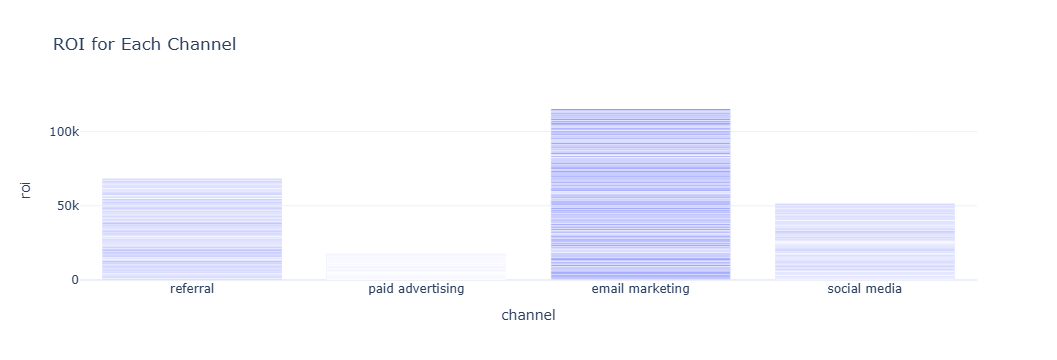

In [50]:
fig_data=data.groupby("channel")["roi"].mean().reset_index()
fig=px.bar(data,
          x="channel",
          y="roi",
          title="ROI for Each Channel")
fig.show()